In [1]:
#Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Scaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import binarize

# Train Test Split
from sklearn.model_selection import train_test_split

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#import xgboost as xgb

#Metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

# Cross Validation
from sklearn.model_selection import GridSearchCV

In [2]:
#Carga de los datos
df = pd.read_csv('winequality-red.csv')

In [7]:
#Separo mi data set en calidad alta y baja 
df[['quality']] = df[['quality']].replace({3:0,4:0,5:0,6:1,7:1,8:1})

In [35]:
#Separamos los datos entre features y target
X = df[['alcohol','sulphates']]
y = df[['quality']]

print(X.columns)
print(y.columns)

Index(['alcohol', 'sulphates'], dtype='object')
Index(['quality'], dtype='object')


In [36]:
#Escalamos los datos
scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

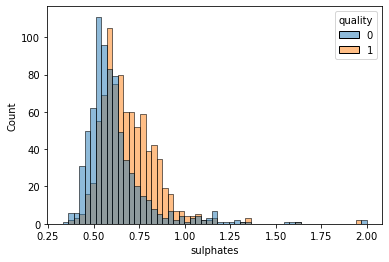

In [8]:
#Analisis de importancia de las variables 
tick_label = sns.histplot(data=df, x="sulphates", hue="quality", multiple="layer")

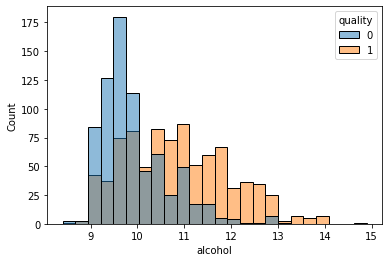

In [9]:
tick_label = sns.histplot(data=df, x="alcohol", hue="quality", multiple="layer")

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

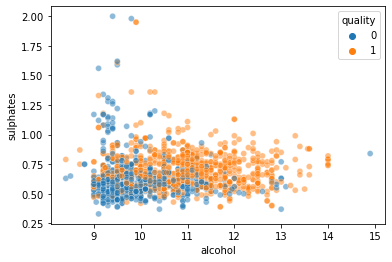

In [10]:
sns.scatterplot(data = df, x = 'alcohol', y = 'sulphates', hue = 'quality', alpha = 0.5)
#entrenar una regr log con estas variables. plotear arriba de este plot y medir el accuracy. generar decision boun. entrenar k means tunear. 

In [18]:
#Entreno una Regresion logistica solo con los datos de alcohol

logreg = LogisticRegression()
logreg.fit(df[['alcohol']], df[['quality']])
y_pred = logreg.predict(df[['alcohol']])
print ((logreg.predict(df[['alcohol']]) == df['quality']).sum()/len(df))
print (logreg.score(df[['alcohol']], df[['quality']]))

#Analizo las Metricas
print(classification_report(y_pred,df[['quality']]))
confusion = confusion_matrix(df[['quality']], y_pred)
print(confusion)

0.7035647279549718
0.7035647279549718
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       796
           1       0.69      0.74      0.71       803

    accuracy                           0.70      1599
   macro avg       0.70      0.70      0.70      1599
weighted avg       0.70      0.70      0.70      1599

[[533 211]
 [263 592]]


In [19]:
#Entreno una regresion logistica solo con los datos de sulphates 

logreg = LogisticRegression()
logreg.fit(df[['sulphates']], df[['quality']])
y_pred = logreg.predict(df[['sulphates']])
print (logreg.score(df[['sulphates']], df[['quality']]))
(logreg.predict(df[['sulphates']]) == df['quality']).sum()/len(df)

#Analizo las Metricas
print(classification_report(y_pred,df[['quality']]))
confusion = confusion_matrix(df[['quality']], y_pred)
print(confusion)

0.6404002501563477
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       723
           1       0.68      0.66      0.67       876

    accuracy                           0.64      1599
   macro avg       0.64      0.64      0.64      1599
weighted avg       0.64      0.64      0.64      1599

[[446 298]
 [277 578]]


In [21]:
logreg = LogisticRegression()
logreg.fit(df[['alcohol','sulphates']], df[['quality']])
y_pred = logreg.predict(df[['alcohol','sulphates']])
print (logreg.score(df[['alcohol','sulphates']], df[['quality']]))
(logreg.predict(df[['alcohol','sulphates']]) == df['quality']).sum()/len(df)

#Analizo las Metricas
print(classification_report(y_pred,df[['quality']]))
confusion = confusion_matrix(df[['quality']], y_pred)
print(confusion)


0.701688555347092
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       791
           1       0.69      0.73      0.71       808

    accuracy                           0.70      1599
   macro avg       0.70      0.70      0.70      1599
weighted avg       0.70      0.70      0.70      1599

[[529 215]
 [262 593]]


In [23]:
#Decision Tree sin Grid Search
dt = DecisionTreeClassifier()
dt.fit(df[['alcohol','sulphates']], df[['quality']])
y_pred = dt.predict(df[['alcohol','sulphates']])
y_pred_proba = dt.predict_proba(df[['alcohol','sulphates']])

#Analizo las metricas
print(classification_report(y_pred,df[['quality']]))
confusion = confusion_matrix(df[['quality']], y_pred)
print(confusion)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       850
           1       0.84      0.96      0.89       749

    accuracy                           0.89      1599
   macro avg       0.90      0.90      0.89      1599
weighted avg       0.90      0.89      0.89      1599

[[712  32]
 [138 717]]


In [24]:
#Random Forest sin Random Search
rf = RandomForestClassifier()
rf.fit(df[['alcohol','sulphates']], df[['quality']])
y_pred = rf.predict(df[['alcohol','sulphates']])
y_pred_proba = rf.predict_proba(df[['alcohol','sulphates']]) 

#Analizo las Metricas
print(classification_report(y_pred,df[['quality']]))
confusion = confusion_matrix(df[['quality']], y_pred)
print(confusion)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       788
           1       0.87      0.92      0.90       811

    accuracy                           0.89      1599
   macro avg       0.90      0.89      0.89      1599
weighted avg       0.89      0.89      0.89      1599

[[681  63]
 [107 748]]


In [33]:
# KNN sin GridSearch
knn = KNeighborsClassifier()
knn.fit(df[['alcohol','sulphates']], df[['quality']])
y_pred = knn.predict(df[['alcohol','sulphates']])

#Analizo las Metricas
print(classification_report(y_pred,df[['quality']]))
confusion = confusion_matrix(df[['quality']], y_pred)
print(confusion)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       728
           1       0.82      0.80      0.81       871

    accuracy                           0.80      1599
   macro avg       0.79      0.80      0.79      1599
weighted avg       0.80      0.80      0.80      1599

[[573 171]
 [155 700]]


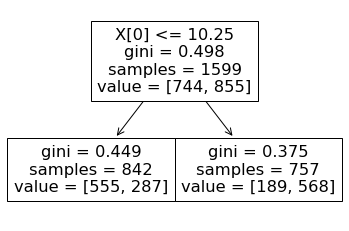

0.7023139462163852


0.7023139462163852

In [34]:
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(df[['alcohol','sulphates']] , df ['quality'])
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()
print ((dt.predict(df[['alcohol','sulphates']]) == df['quality']).sum()/len(df))
dt.score(df[['alcohol','sulphates']], df['quality'] )

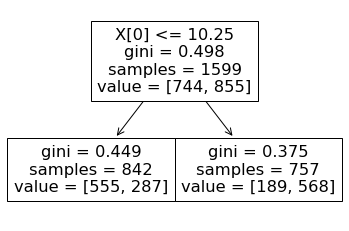

0.7023139462163852

In [29]:
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(df[['alcohol']] , df ['quality'])
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()
(dt.predict(df[['alcohol']]) == df['quality']).sum()/len(df)

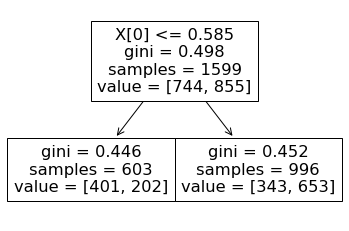

0.6591619762351469

In [30]:
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(df[['sulphates']] , df ['quality'])
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()
(dt.predict(df[['sulphates']]) == df['quality']).sum()/len(df)

TRABAJO CON LOS DATOS ESCALADOS 

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        98
           1       0.56      0.79      0.65        62

    accuracy                           0.68       160
   macro avg       0.69      0.70      0.67       160
weighted avg       0.72      0.68      0.68       160

[[59 13]
 [39 49]]


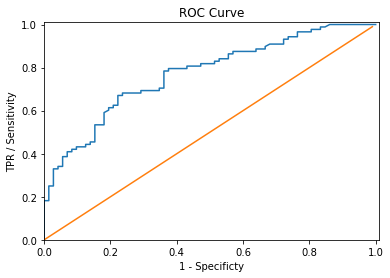


 AUC= 0.7709122474747475


In [48]:
#Naive Bayes para utilizar de baseline
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_nb = gnb.predict(X_test_scaled)
y_pred_nb_proba = gnb.predict_proba(X_test_scaled)

#Analizo las Metricas
#models_accuracy["Naive Bayes"] = accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))
confusion = confusion_matrix(y_test, y_pred_nb)
print(confusion)

#analizo una curva de ROC
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_nb_proba[:,1])
df_roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df_roc['fpr'],df_roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

print('\n', 'AUC=', auc(fpr_log, tpr_log))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65        78
           1       0.67      0.72      0.69        82

    accuracy                           0.68       160
   macro avg       0.68      0.67      0.67       160
weighted avg       0.68      0.68      0.67       160

[[49 23]
 [29 59]]


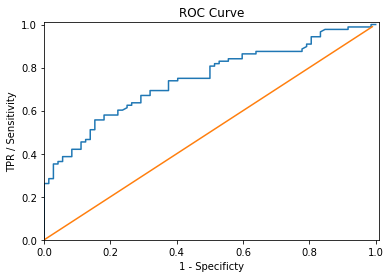


 AUC= 0.7464488636363636


In [39]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)

#Analizo las metricas
#models_accuracy["Logistic Regression"] = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
 

#analizo una curva de ROC
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
df_roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df_roc['fpr'],df_roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

print('\n', 'AUC=', auc(fpr_log, tpr_log))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        76
           1       0.69      0.73      0.71        84

    accuracy                           0.69       160
   macro avg       0.69      0.69      0.69       160
weighted avg       0.69      0.69      0.69       160

[[49 23]
 [27 61]]


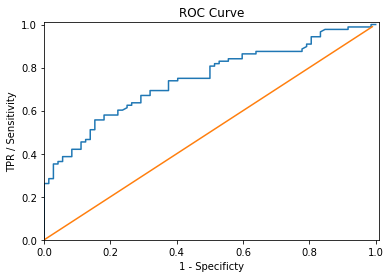


 AUC= 0.7464488636363636


In [42]:
# KNN sin GridSearch
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

#Analizo las Metricas
print(classification_report(y_pred,y_test))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

#analizo una curva de ROC
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
df_roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df_roc['fpr'],df_roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

print('\n', 'AUC=', auc(fpr_log, tpr_log))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70        86
           1       0.65      0.77      0.70        74

    accuracy                           0.70       160
   macro avg       0.71      0.70      0.70       160
weighted avg       0.71      0.70      0.70       160

[[55 17]
 [31 57]]


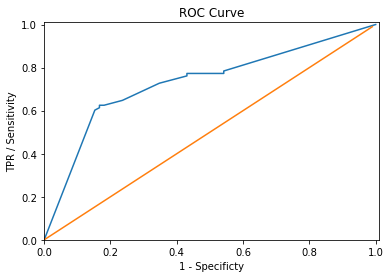


 AUC= 0.7316130050505051


In [44]:
#Decision Tree sin Grid Search
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
y_pred_proba = dt.predict_proba(X_test_scaled)

#Analizo las metricas
print(classification_report(y_pred,y_test))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

#analizo una curva de ROC
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
df_roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df_roc['fpr'],df_roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

print('\n', 'AUC=', auc(fpr_log, tpr_log))

In [45]:
#Random Forest sin Random Search
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_pred_proba = rf.predict_proba(X_test_scaled)

#Analizo las Metricas
print(classification_report(y_pred,y_test))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        74
           1       0.74      0.76      0.75        86

    accuracy                           0.73       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.72      0.72      0.72       160

[[51 21]
 [23 65]]


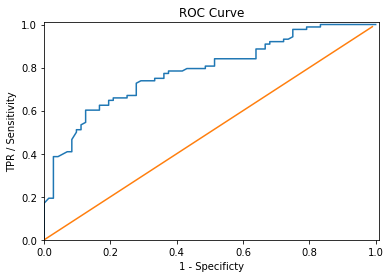


 AUC= 0.7841698232323232


In [46]:
#analizo una curva de ROC
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
df_roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df_roc['fpr'],df_roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

print('\n', 'AUC=', auc(fpr_log, tpr_log))

In [52]:
classifiers = [('Naive Bayes',gnb),
              ('Logistic Regression',logreg),
              ('K Nearest Neighbors', knn),
              ('Classification Tree', dt),]


vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

#Analizo las metricas
#models_accuracy["Voting Classifier"] = accuracy_score(y_pred,y_test)
print("Voting Classifier",accuracy_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(confusion)
print(vc.score(X_train, y_train))


Voting Classifier 0.70625
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        95
           1       0.60      0.82      0.69        65

    accuracy                           0.71       160
   macro avg       0.72      0.72      0.71       160
weighted avg       0.74      0.71      0.71       160

[[60 12]
 [35 53]]
0.7623349548297429


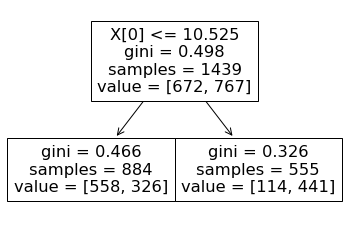

0.6904315196998124


0.6942321056289089

In [54]:
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(X_train, y_train)
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()
print ((dt.predict(df[['alcohol','sulphates']]) == df['quality']).sum()/len(df))
#Predice distinto que antes por el fitteo del modelo
dt.score(X_train, y_train)